# Test GEModelTools - HANK

This notebook shows how to **solve a simple Heterogenous Agent New Keynessian (HANK) model** using the `GEModelTools` package.

**The steps of the sequence-space solution method are:**

1. Find the stationary equilibrium (steady state for aggregates and distribution).
2. Compute Jacobians of the household block and the full model (to unknowns and shocks)
3. Find the non-linear transition path or the linearized impulse responses to a given shock path.
4. Simulate the linearized model with aggregate risk

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
import sys
from scipy import optimize

import matplotlib.pyplot as plt   
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
#np.set_printoptions(threshold=sys.maxsize)

from HANKmodel import HANKModelClass

# Setup

In [2]:
#print(model)
model = HANKModelClass(name='baseline')
#model.print_unpack_varlist()

# Step 1: Steady state

In [3]:
model.find_ss(do_print=True)

steady state found in 16.5 secs
 Q   =   0.6439
 P   =   0.7126
 C Luxury low   =   0.3343
 C Luxury high   =   0.7316
 C Necessity low   =   0.1576
 C necessity high   =   0.2260
 p low   =   0.7858
 p high   =   0.7429
 Z_N   =   0.1400
 Z_L   =   0.5508
 M_N   =   0.3481
 M_L   =   0.1141
 N_L   =   0.7032
 N_N   =   0.4727
 HH_ell   =   1.1968
 wage N  =   0.2770
 wage L  =   0.4302
 par.varphi   =   0.8000
 par.beta   =   0.9864
Discrepancy in B =   0.00000000
Discrepancy in C =   0.00000000
Discrepancy in C_L =   0.00000000
Discrepancy in C_N =  -0.00000000
Discrepancy in N =   0.00000000


In [4]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

Text(0, 0.5, '$c_{L,t}$')

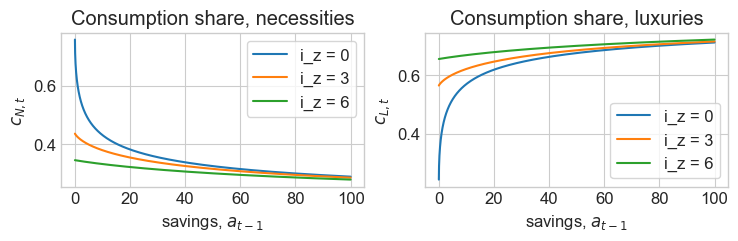

In [5]:
fig = plt.figure(figsize=(18,2),dpi=100)
a_max = 500

# a. necessity consumption share
I = par.a_grid < a_max

ax = fig.add_subplot(1,4,1)
ax.set_title(f'Consumption share, necessities')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c_N[0,i_z,I]/(ss.P*ss.c[0,i_z,I]),label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('$c_{N,t}$')

# a. luxury consumption share
I = par.a_grid < a_max

ax = fig.add_subplot(1,4,2)
ax.set_title(f'Consumption share, luxuries')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.Q*ss.c_L[0,i_z,I]/(ss.P*ss.c[0,i_z,I]),label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('$c_{L,t}$')

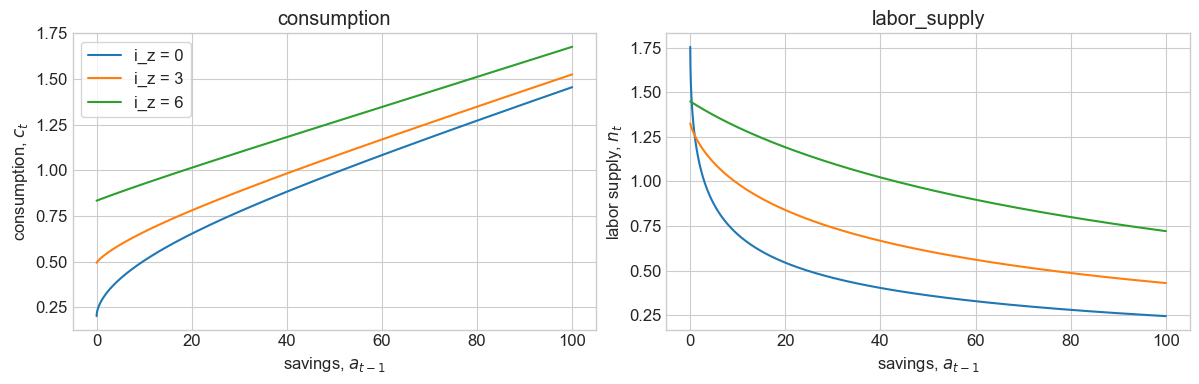

In [6]:
fig = plt.figure(figsize=(18,4),dpi=100)
a_max = 500

# a. consumption
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,1)
ax.set_title(f'consumption')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.c[0,i_z,I],label=f'i_z = {i_z}')

ax.legend(frameon=True)
ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('consumption, $c_t$')

# c. labor supply
I = par.a_grid < a_max

ax = fig.add_subplot(1,3,2)
ax.set_title(f'labor_supply')

for i_z in [0,par.Nz//2,par.Nz-1]:
    ax.plot(par.a_grid[I],ss.ell[0,i_z,I],label=f'i_z = {i_z}')

ax.set_xlabel('savings, $a_{t-1}$')
ax.set_ylabel('labor supply, $n_{t}$')

fig.tight_layout()

# Step 2: Compute Jacobians (incl. tests)

**Household transition path:**

note: inputs = steady state value -> expected: constant value (straigt line)

household problem solved along transition path in 0.7 secs
household problem simulated along transition in 2.5 secs



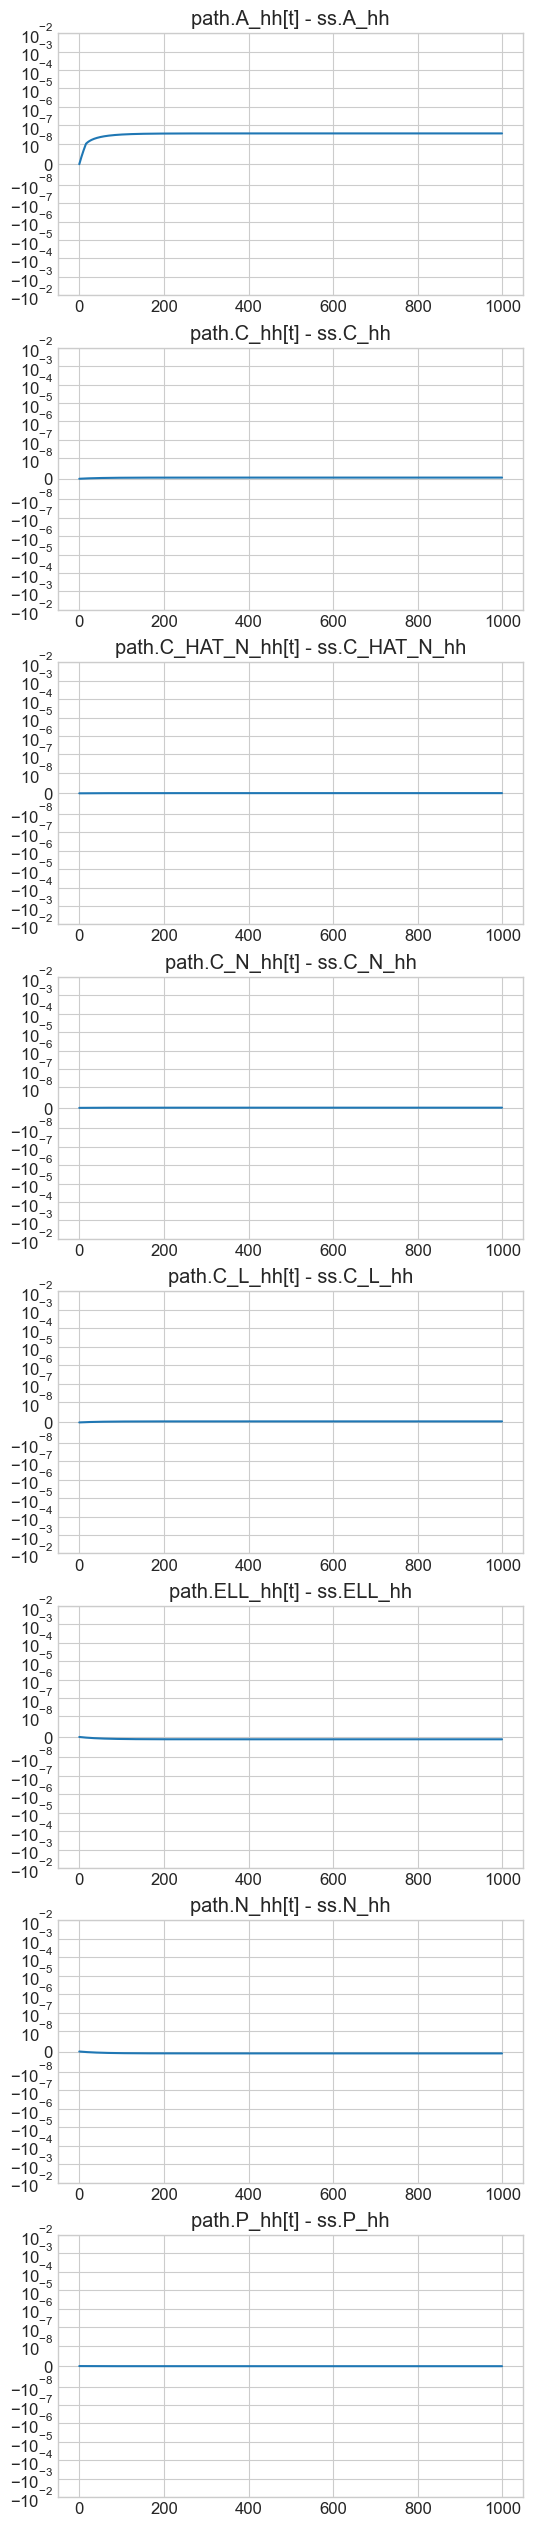

In [7]:
model.test_hh_path()

**Full transition path:**

In [8]:
model.test_path()

note: inputs = steady state value -> expected: no difference to steady state and zero errors

difference to value at steady state:
A              : t0 =  0.0e+00, max abs.  0.0e+00
B              : t0 =  0.0e+00, max abs.  0.0e+00
C              : t0 =  0.0e+00, max abs.  0.0e+00
C_N            : t0 =  0.0e+00, max abs.  0.0e+00
C_L            : t0 =  0.0e+00, max abs.  0.0e+00
d_N            : t0 =  0.0e+00, max abs.  0.0e+00
d_L            : t0 =  0.0e+00, max abs.  0.0e+00
G              : t0 =  0.0e+00, max abs.  0.0e+00
i              : t0 =  0.0e+00, max abs.  0.0e+00
N              : t0 =  0.0e+00, max abs.  0.0e+00
N_N            : t0 =  0.0e+00, max abs.  0.0e+00
N_L            : t0 =  0.0e+00, max abs.  0.0e+00
M_N            : t0 =  0.0e+00, max abs.  0.0e+00
M_L            : t0 =  0.0e+00, max abs.  0.0e+00
pm_L           : t0 =  0.0e+00, max abs.  0.0e+00
pm_N           : t0 =  0.0e+00, max abs.  0.0e+00
pi             : t0 =  0.0e+00, max abs.  0.0e+00
pi_N           : t0

note: differences should only be due to numerical errors

direct method:
finding Jacobian wrt. ghost          : 50 100 150 [computed in 4.7 secs]
finding Jacobian wrt. P              : 50 100 150 [computed in 2.2 secs]
finding Jacobian wrt. Q              : 50 100 150 [computed in 1.8 secs]
finding Jacobian wrt. d_L            : 50 100 150 [computed in 2.0 secs]
finding Jacobian wrt. d_N            : 50 100 150 [computed in 1.8 secs]
finding Jacobian wrt. r              : 50 100 150 [computed in 1.8 secs]
finding Jacobian wrt. tau            : 50 100 150 [computed in 1.8 secs]
finding Jacobian wrt. w_N            : 50 100 150 [computed in 1.9 secs]
household Jacobian computed in 22.3 secs

fake news method:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for P               in 1.3 secs
curly_Y and curly_D calculated for Q               in 1.1 secs
curly_Y and curly_D calculated for d_L             in 1.1 secs
curly_Y and curly_D calculated for

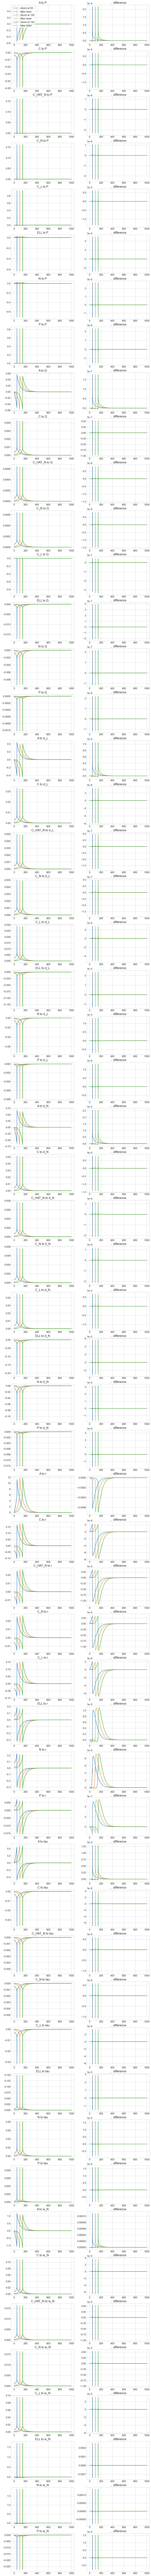

In [18]:
#model.compute_jacs(do_print=True)
model.test_jacs(s_list=[50,100,150])

# Step 3a: Find non-linear transition path

## Find transition path

In [22]:
model.find_transition_path(do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 3.32e-03
   2.23e-04 in NKPC_res_N
   8.85e-05 in NKPC_res_L
   3.32e-03 in clearing_A
   2.58e-04 in clearing_N
   8.94e-04 in clearing_C_N
 it =   1 -> max. abs. error = 7.94e-05
   9.84e-07 in NKPC_res_N
   2.37e-07 in NKPC_res_L
   3.88e-05 in clearing_A
   7.94e-05 in clearing_N
   1.05e-05 in clearing_C_N
 it =   2 -> max. abs. error = 4.60e-06
   2.24e-08 in NKPC_res_N
   5.02e-08 in NKPC_res_L
   3.89e-06 in clearing_A
   4.60e-06 in clearing_N
   2.59e-07 in clearing_C_N
 it =   3 -> max. abs. error = 6.93e-08
   8.91e-10 in NKPC_res_N
   7.88e-10 in NKPC_res_L
   5.92e-08 in clearing_A
   6.93e-08 in clearing_N
   6.60e-09 in clearing_C_N
 it =   4 -> max. abs. error = 2.84e-10
   9.88e-12 in NKPC_res_N
   2.34e-12 in NKPC_res_L
   2.02e-10 in clearing_A
   2.84e-10 in clearing_N
   1.40e-11 in clearing_C_N
 it =   5 -> max. abs. error = 3.19e-12
   8.93e-14 in NKPC_res_N
   1.74e-14 in NKPC_res_L
   2.71e-12 in clea

## Plot transitions

### shocks ###


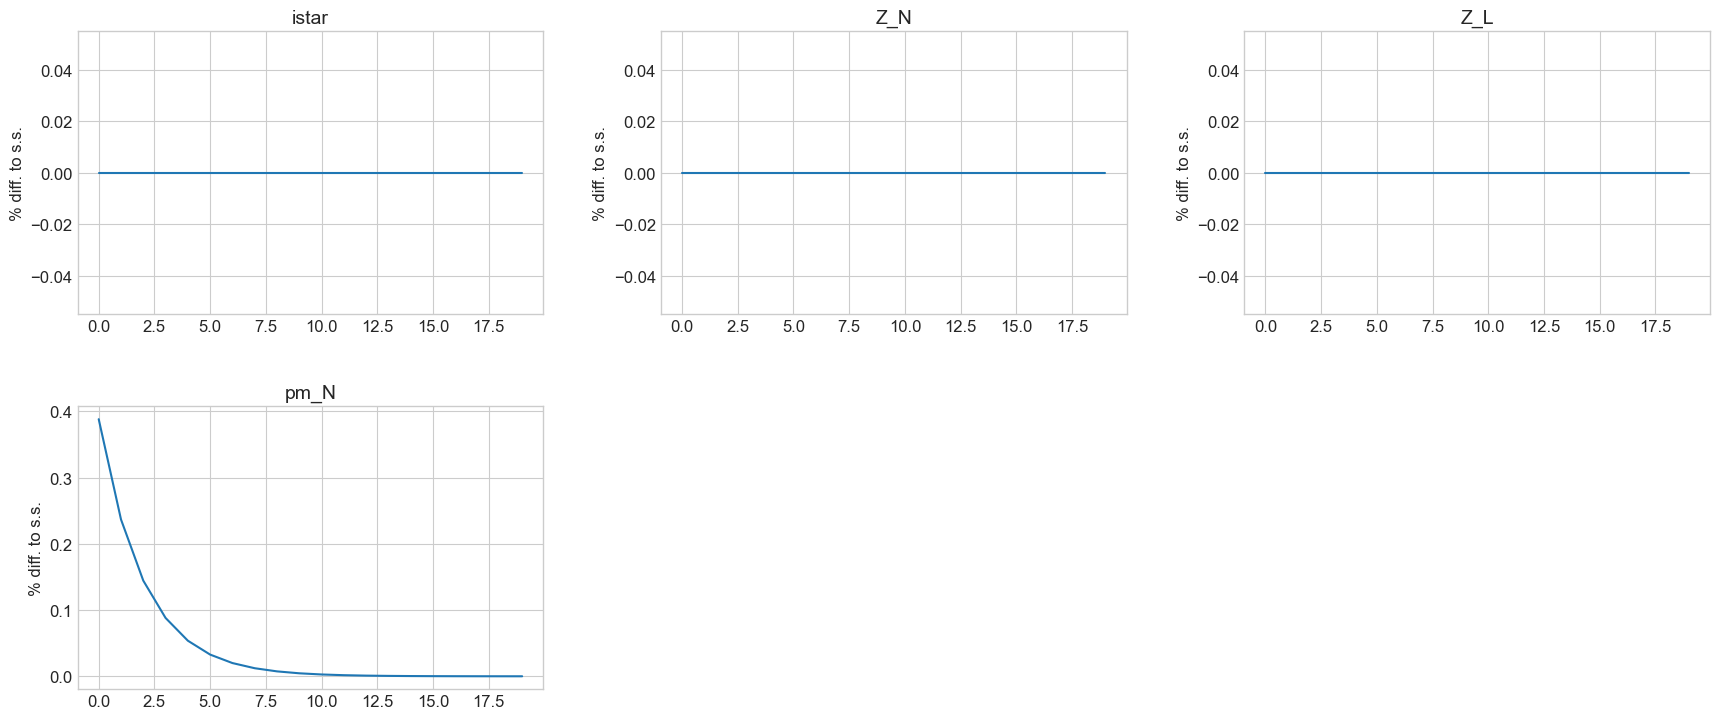


### varnames ###


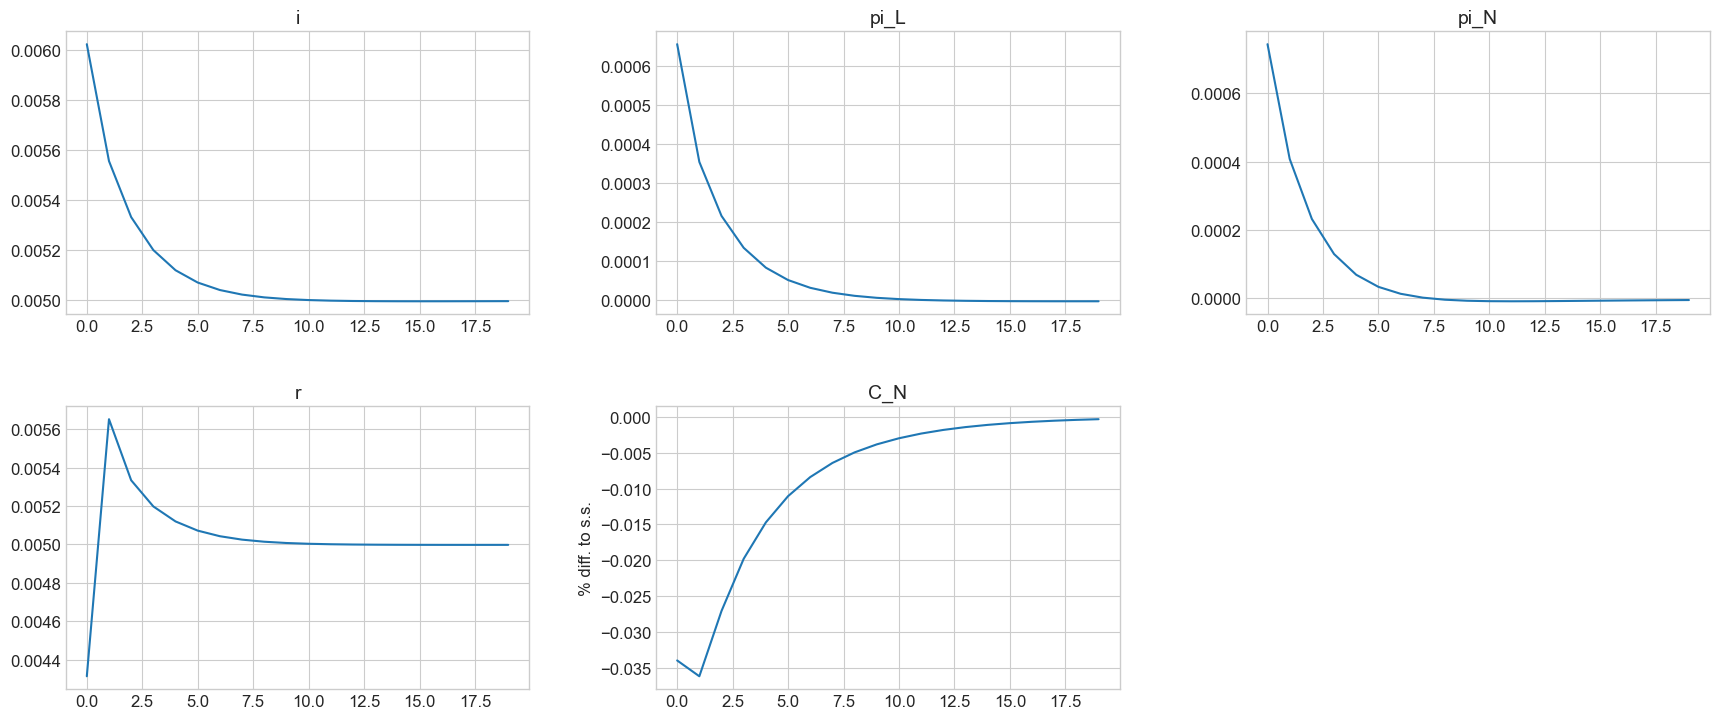


### tagets ###


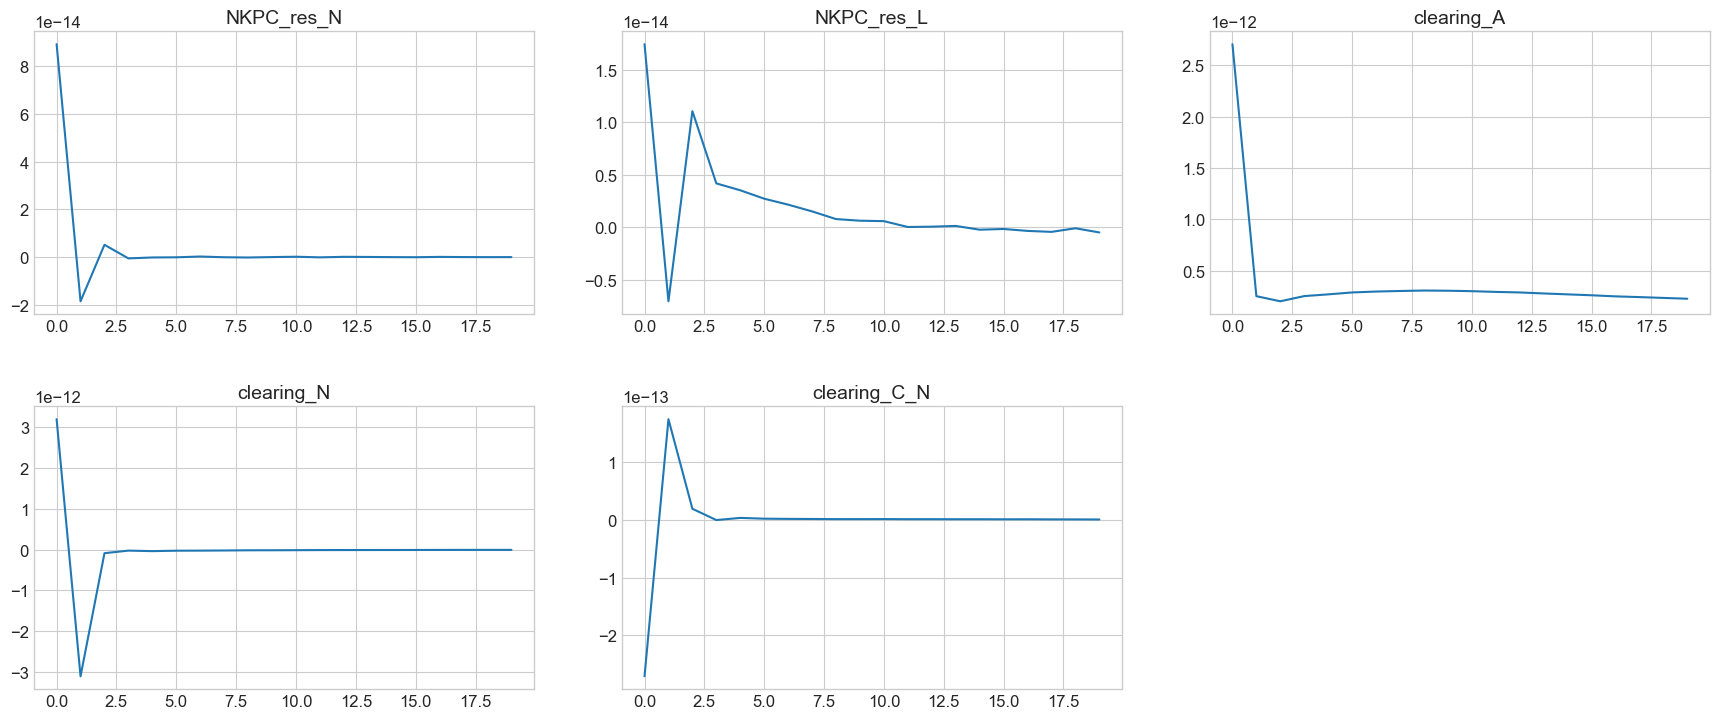

In [23]:
paths = ['i','pi_L','pi_N','r','C_N']
lvl_value = ['i','pi_L','pi_N','r']
model.show_IRFs(paths,lvl_value=lvl_value,T_max=20,ncols=3)

# Step 3b: Find linearized IRFs

In [24]:
par.jump_istar = -0.0

model.find_IRFs(do_print=True)

linear transition path found in 7.2 secs [finding solution matrix: 3.4 secs]


### shocks ###


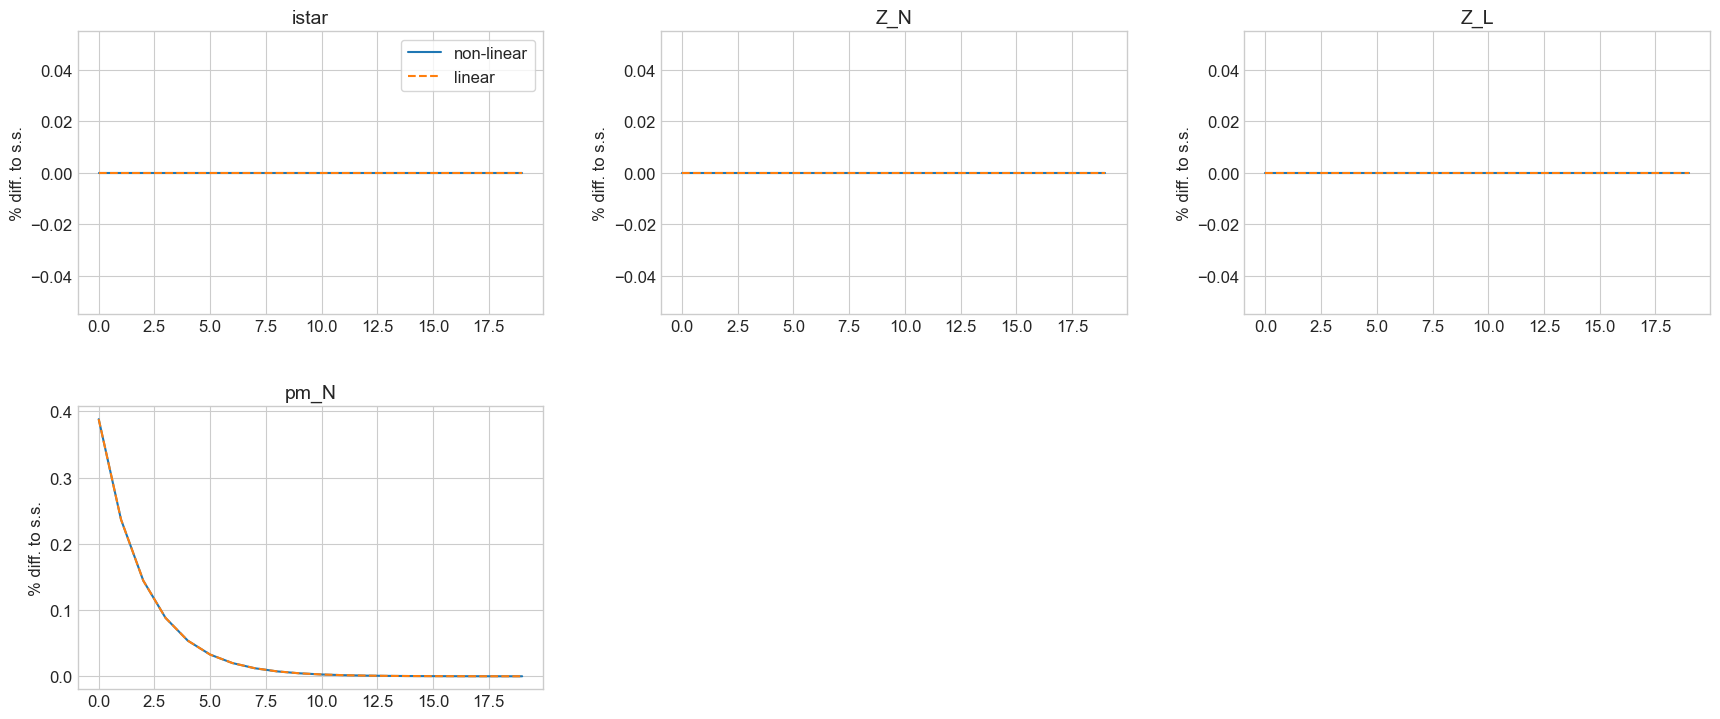


### varnames ###


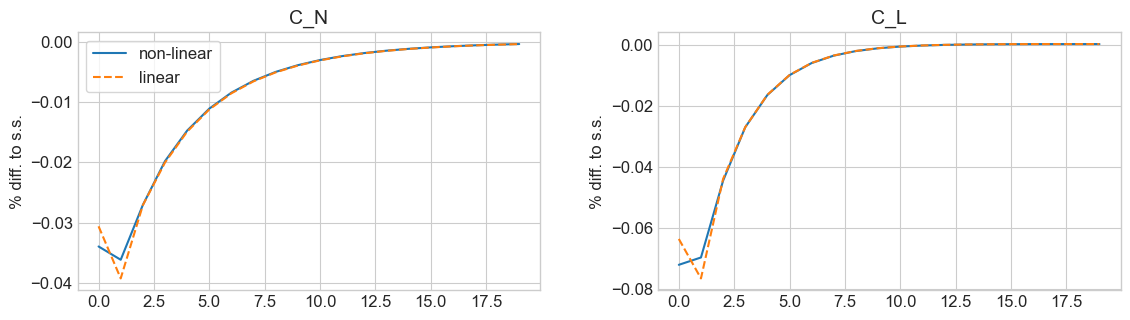


### tagets ###


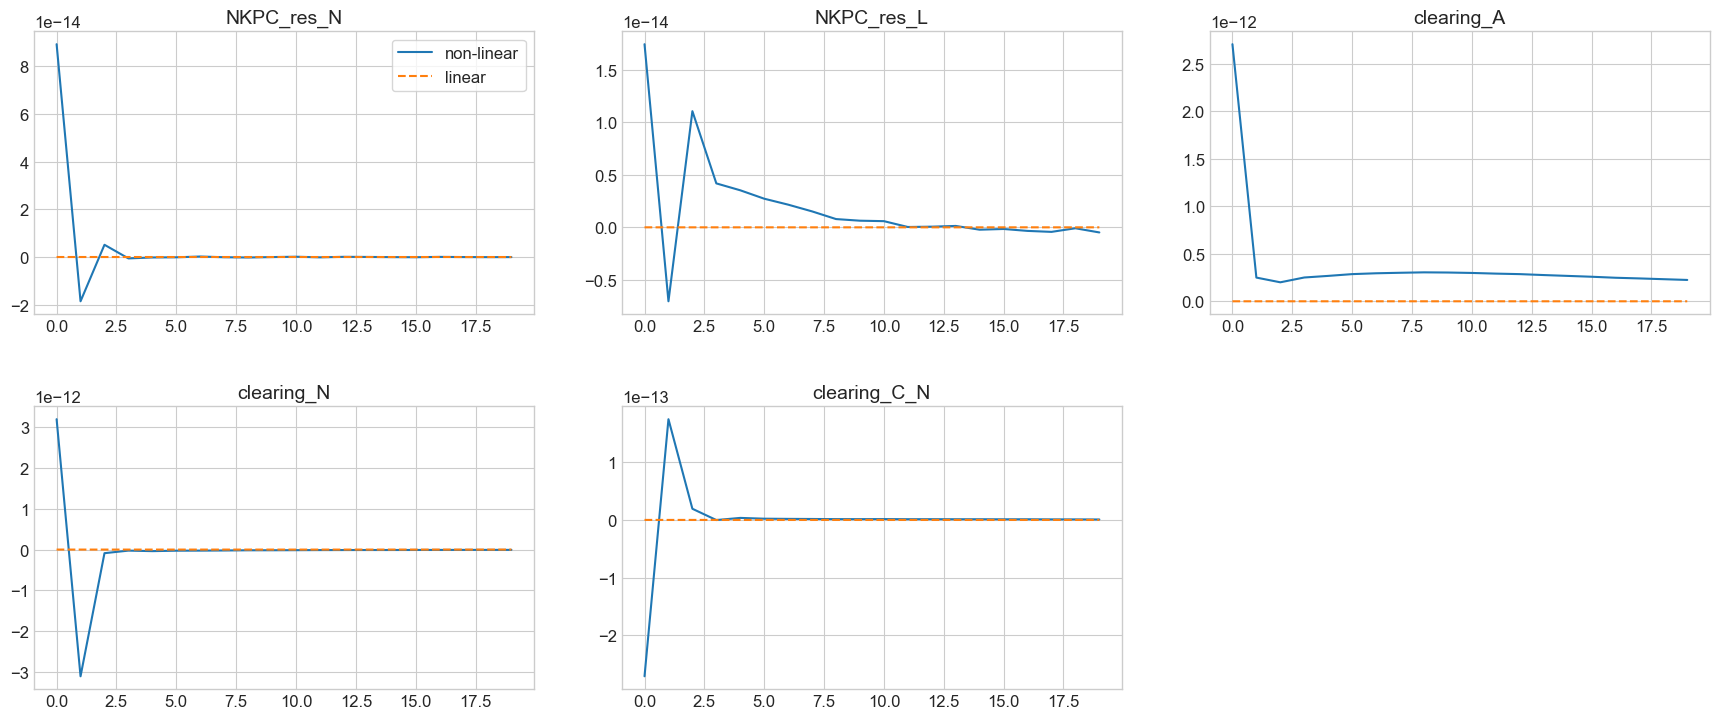

In [25]:
paths = ['C_N', 'C_L']
model.show_IRFs(paths,T_max=20,ncols=3,do_linear=True)

In [26]:
#model_ = model.copy()
#model_.par_phi_y = 1.0
#model_.find_ss
#model_.compute_jacs()
#model_.find_transition_path()

# Step 4. Simulation

In [27]:
np.random.seed(1917)
model.simulate(do_print=True)

simulation prepared in 1.0 mins 53 secs [solution matrix: 6.7 secs, households: 1.0 mins 43 secs]
aggregates simulated in 0.1 secs
household policies simulated in 20.7 secs
distribution simulated in 0.5 secs
aggregates calculated from distribution in 0.0 secs


In [16]:
def model_sim():
    
    fig = plt.figure(figsize=(12,8),dpi=100)

    ax = fig.add_subplot(2,2,1)
    ax.set_title('i')
    ax.plot(ss.i+sim.di,ls='--')
    ax.axhline(ss.i,color='black',zorder=0)

    ax = fig.add_subplot(2,2,2)
    ax.set_title('pi')
    ax.plot(ss.pi+sim.dpi,ls='--',)
    ax.axhline(ss.pi,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,3)
    ax.set_title('r')
    ax.plot(ss.r+sim.dr,ls='--',)
    ax.axhline(ss.r,color='black',zorder=0)
    
    ax = fig.add_subplot(2,2,4)
    ax.set_title('C')
    ax.plot(ss.C+sim.dC,ls='--',)
    ax.axhline(ss.C,color='black',zorder=0)
    

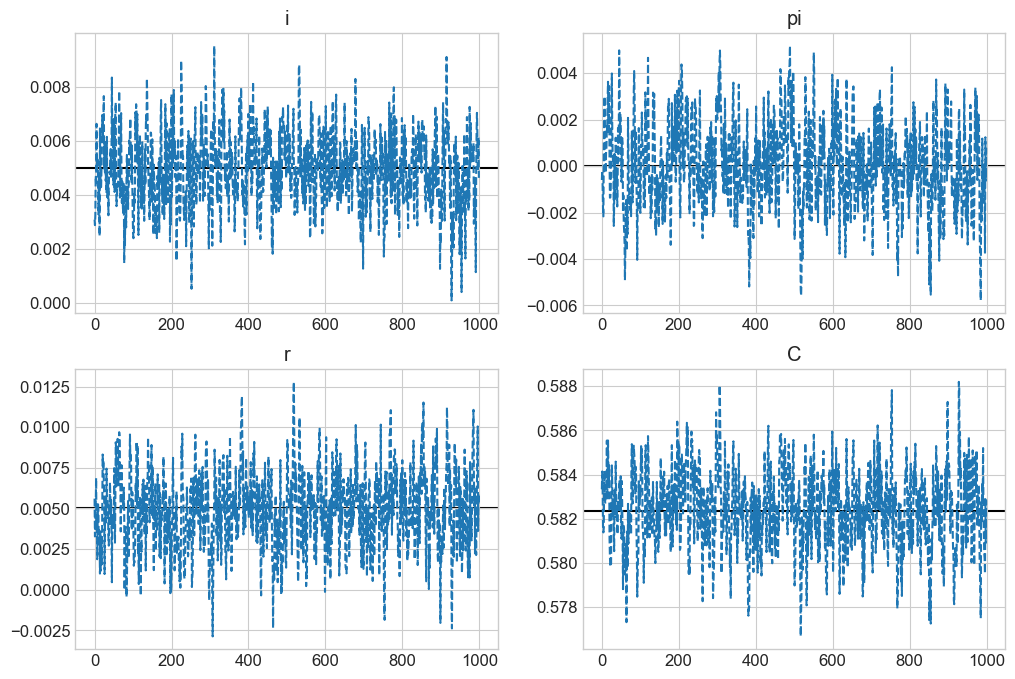

In [17]:
model_sim()